<a href="https://colab.research.google.com/github/Shuaib11-Github/shuaib/blob/master/Linear%2C%20Ridge%2C%20Lasso%2C%20ElasticNet%20analysis%20with%20and%20without%20outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis of Linear, Ridge, Lasso, ElasticNet without outliers:

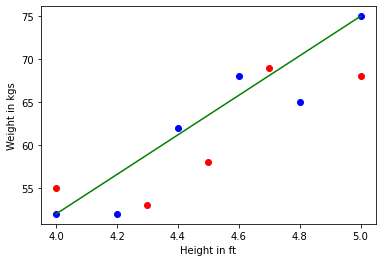

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = [ [4.0,52],[4.2,52],[4.4,62],[4.6,68], [4.8,65], [5,75]]
test = [[5,68], [4.3,53], [4.7,69], [4,55], [4.5,58]]
X_train = [4.0, 4.2, 4.4, 4.6, 4.8, 5]
y_train = [52, 52, 62, 68, 65, 75]
X_test = [5, 4.3, 4.7, 4, 4.5]
y_test = [68, 53, 69, 55, 58]
plt.scatter(np.array(X_train),y_train,color='blue')
plt.scatter(np.array(X_test),y_test,color='red')
plt.plot([min(X_train), max(X_train)], [min(y_train), max(y_train)], color='green') # predicted
plt.xlabel('Height in ft')
plt.ylabel('Weight in kgs')
plt.show()

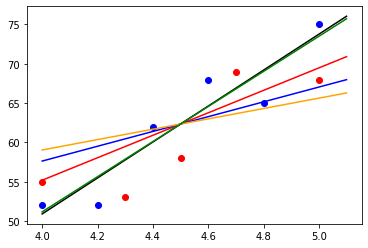

In [71]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train,y_train)
model_lnr = LinearRegression()
model_lnr.fit(X_train,y_train)
model_en = ElasticNet(alpha = 0.5, l1_ratio = 0.5, random_state = 0)
model_en.fit(X_train,y_train)
model_encv = ElasticNetCV(cv = 2, random_state = 0)
model_encv.fit(X_train,y_train)

x_gen = np.linspace(4,5.1,50)
x_gen = x_gen.reshape(-1,1)
y_las= model_lasso.predict(x_gen)
y_lnr = model_lnr.predict(x_gen)
y_rid = model_ridge.predict(x_gen)
y_en = model_en.predict(x_gen)
y_encv = model_encv.predict(x_gen)

plt.scatter(np.array(X_train),y_train,color='blue')
plt.scatter(np.array(X_test),y_test,color='red')
plt.plot(x_gen,y_lnr,color='black')
plt.plot(x_gen,y_las,color='red')
plt.plot(x_gen,y_rid,color='blue')
plt.plot(x_gen,y_en,color='orange')
plt.plot(x_gen,y_encv,color='green')
plt.show()

### Accuracy with respect to Test data:

In [72]:
lnr_score = model_lnr.score(X_test, y_test)
rid_score = model_ridge.score(X_test, y_test)
lasso_score = model_lasso.score(X_test, y_test)
en_score = model_en.score(X_test, y_test)
encv_score = model_encv.score(X_test, y_test)

print('Alpha from Cross Validation:')
print(model_encv.alpha_)
print('\nModel predictions:')
print(lnr_score)
print(rid_score)
print(lasso_score)
print(en_score)
print(encv_score)

Alpha from Cross Validation:
0.005333333333333334

Model predictions:
0.566844218097124
0.5252660508234068
0.6498792404243197
0.3962304078098091
0.5832453279342337


### Accuracy with respect to Training data:

In [73]:
lnr_score = model_lnr.score(X_train, y_train)
rid_score = model_ridge.score(X_train, y_train)
lasso_score = model_lasso.score(X_train, y_train)
en_score = model_en.score(X_train, y_train)
encv_score = model_encv.score(X_train, y_train)

print(lnr_score)
print(rid_score)
print(lasso_score)
print(en_score)
print(encv_score)

0.8847926267281104
0.578636008483089
0.76036866359447
0.4366960477206072
0.8843112906749513


### Predicting for a new data point

In [74]:
lnr1 = model_lnr.predict([[5.2]])
rid1 = model_ridge.predict([[5.2]])
las1 = model_lasso.predict([[5.2]])
en1 = model_en.predict([[5.2]])
encv1 = model_encv.predict([[5.2]])

print(lnr1)
print(rid1)
print(las1)
print(en1)
print(encv1)

[78.33333333]
[68.92156863]
[72.33333333]
[66.9469697]
[77.96014898]


### Analysis of Linear, Ridge, Lasso, ElasticNet with outliers being ***Homoscedasticity***:

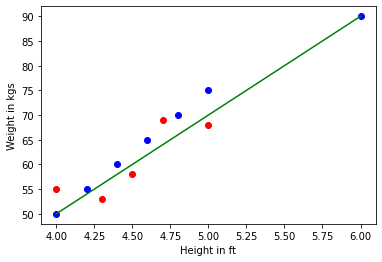

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = [ [4.0,50],[4.2,55],[4.4,60],[4.6,65], [4.8,70], [5,75], [6, 90]]
test = [[5,68], [4.3,53], [4.7,69], [4,55], [4.5,58]]
X_train = [4.0, 4.2, 4.4, 4.6, 4.8, 5, 6]
y_train = [50, 55, 60, 65, 70, 75, 90]
X_test = [4, 4.3, 4.5, 4.7, 5]
y_test = [55, 53, 58, 69, 68]
plt.scatter(np.array(X_train),y_train,color='blue')
plt.scatter(np.array(X_test),y_test,color='red')
plt.plot([min(X_train), max(X_train)], [min(y_train), max(y_train)], color='green') # predicted
plt.xlabel('Height in ft')
plt.ylabel('Weight in kgs')
plt.show()

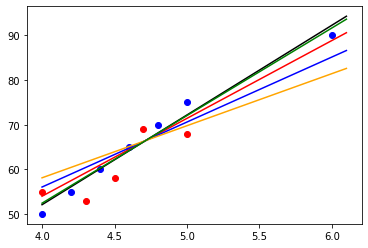

In [94]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train,y_train)
model_lnr = LinearRegression()
model_lnr.fit(X_train,y_train)
model_en = ElasticNet(alpha = 0.5, l1_ratio = 0.5, random_state = 0)
model_en.fit(X_train,y_train)
model_encv = ElasticNetCV(cv = 2, random_state = 0)
model_encv.fit(X_train,y_train)

x_gen = np.linspace(4,6.1,50)
x_gen = x_gen.reshape(-1,1)
y_las= model_lasso.predict(x_gen)
y_lnr = model_lnr.predict(x_gen)
y_rid = model_ridge.predict(x_gen)
y_en = model_en.predict(x_gen)
y_encv = model_encv.predict(x_gen)

plt.scatter(np.array(X_train),y_train,color='blue')
plt.scatter(np.array(X_test),y_test,color='red')
plt.plot(x_gen,y_lnr,color='black')
plt.plot(x_gen,y_las,color='red')
plt.plot(x_gen,y_rid,color='blue')
plt.plot(x_gen,y_en,color='orange')
plt.plot(x_gen,y_encv,color='green')
plt.show()

### Accuracy with respect to Test data with outlier:

In [99]:
lnr_score = model_lnr.score(X_test, y_test)
rid_score = model_ridge.score(X_test, y_test)
lasso_score = model_lasso.score(X_test, y_test)
en_score = model_en.score(X_test, y_test)
encv_score = model_encv.score(X_test, y_test)

print('Alpha from Cross Validation:')
print(model_encv.alpha_)
print('\nModel predictions:')
print(lnr_score)
print(rid_score)
print(lasso_score)
print(en_score)
print(encv_score)

Alpha from Cross Validation:
0.01736367707335356

Model predictions:
0.6511514996393614
0.5555311454203375
0.6332601997781482
0.4161962616100134
0.6517632736386324


### Accuracy with respect to Training data with outlier:

In [100]:
lnr_score = model_lnr.score(X_train, y_train)
rid_score = model_ridge.score(X_train, y_train)
lasso_score = model_lasso.score(X_train, y_train)
en_score = model_en.score(X_train, y_train)
encv_score = model_encv.score(X_train, y_train)

print(lnr_score)
print(rid_score)
print(lasso_score)
print(en_score)
print(encv_score)

0.9789759725400458
0.9046225987188817
0.9618063501144165
0.8066549564114908
0.9784250967258091


### Predicting for a new data point:

In [98]:
lnr1 = model_lnr.predict([[6.2]])
rid1 = model_ridge.predict([[6.2]])
las1 = model_lasso.predict([[6.2]])
en1 = model_en.predict([[6.2]])
encv1 = model_encv.predict([[6.2]])

print(lnr1)
print(rid1)
print(las1)
print(en1)
print(encv1)

[96.30434783]
[88.07086614]
[92.34782609]
[83.76998369]
[95.59565174]


### Analysis of Linear, Ridge, Lasso, ElasticNet with outliers being ***Heteroscedasticity***:

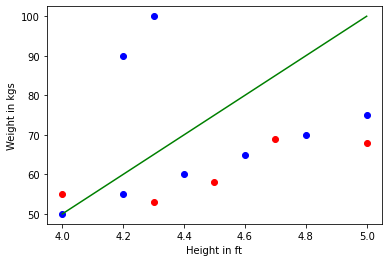

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = [ [4.0,50],[4.2,55],[4.4,60],[4.6,65], [4.8,70], [5,75], [4.2, 90], [4.3, 100]]
test = [[5,68], [4.3,53], [4.7,69], [4,55], [4.5,58]]
X_train = [4.0, 4.2, 4.4, 4.6, 4.8, 5, 4.2, 4.3]
y_train = [50, 55, 60, 65, 70, 75, 90, 100]
X_test = [4, 4.3, 4.5, 4.7, 5]
y_test = [55, 53, 58, 69, 68]
plt.scatter(np.array(X_train),y_train,color='blue')
plt.scatter(np.array(X_test),y_test,color='red')
plt.plot([min(X_train), max(X_train)], [min(y_train), max(y_train)], color='green') # predicted
plt.xlabel('Height in ft')
plt.ylabel('Weight in kgs')
plt.show()

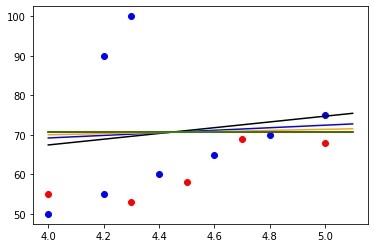

In [83]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train,y_train)
model_lnr = LinearRegression()
model_lnr.fit(X_train,y_train)
model_en = ElasticNet(alpha = 0.5, l1_ratio = 0.5, random_state = 0)
model_en.fit(X_train,y_train)
model_encv = ElasticNetCV(cv = 2, random_state = 0)
model_encv.fit(X_train,y_train)

x_gen = np.linspace(4,5.1,50)
x_gen = x_gen.reshape(-1,1)
y_las= model_lasso.predict(x_gen)
y_lnr = model_lnr.predict(x_gen)
y_rid = model_ridge.predict(x_gen)
y_en = model_en.predict(x_gen)
y_encv = model_encv.predict(x_gen)

plt.scatter(np.array(X_train),y_train,color='blue')
plt.scatter(np.array(X_test),y_test,color='red')
plt.plot(x_gen,y_lnr,color='black')
plt.plot(x_gen,y_las,color='red')
plt.plot(x_gen,y_rid,color='blue')
plt.plot(x_gen,y_en,color='orange')
plt.plot(x_gen,y_encv,color='green')
plt.show()

### Analysis with respect to Test data:

In [84]:
lnr_score = model_lnr.score(X_test, y_test)
rid_score = model_ridge.score(X_test, y_test)
lasso_score = model_lasso.score(X_test, y_test)
en_score = model_en.score(X_test, y_test)
encv_score = model_encv.score(X_test, y_test)

print('Alpha from Cross Validation:')
print(model_encv.alpha_)
print('\nModel predictions:')
print(lnr_score)
print(rid_score)
print(lasso_score)
print(en_score)
print(encv_score)

Alpha from Cross Validation:
1.4531249999999982

Model predictions:
-1.9831478919275443
-2.10814140796779
-2.2717139466546112
-2.1958579891394017
-2.2717139466546112


### Analysis with respect to Training data:

In [85]:
lnr_score = model_lnr.score(X_train, y_train)
rid_score = model_ridge.score(X_train, y_train)
lasso_score = model_lasso.score(X_train, y_train)
en_score = model_en.score(X_train, y_train)
encv_score = model_encv.score(X_train, y_train)

print(lnr_score)
print(rid_score)
print(lasso_score)
print(en_score)
print(encv_score)

0.020415099951139437
0.014105382722826909
0.0
0.006927815501673984
0.0


### Predicting for a new data point:

In [91]:
lnr1 = model_lnr.predict([[7.0]])
rid1 = model_ridge.predict([[7.0]])
las1 = model_lasso.predict([[7.0]])
en1 = model_en.predict([[7.0]])
encv1 = model_encv.predict([[7.0]])

print(lnr1)
print(rid1)
print(las1)
print(en1)
print(encv1)

[89.27230047]
[78.90548992]
[70.625]
[74.11567664]
[70.625]
